# How to make a drift-diffusion plot

This notebook includes a simple function that makes a customizable drift-diffusion plot. Drift diffusion plots show how something drifts between two bounds over time. They're commonly used in models of evidence accumulation and decision making.

### import libraries and format plots

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=customPalette)

### create timeseries data

In [9]:
t = 100   #number of timepoints
n = 20    #number of timeseries
bias = 0.1  #bias in random walk

#generate "biased random walk" timeseries
data = pd.DataFrame(np.reshape(np.cumsum(np.random.randn(t,n)+bias,axis=0),(t,n)))
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.783576,1.448423,2.929403,0.736987,0.300089,0.221030,0.481614,0.737701,-0.758835,-1.398028,0.440008,0.677116,-0.473364,-0.631431,0.042252,0.678995,0.754267,-0.312934,1.313482,2.254803
1,-1.380603,1.085704,0.201276,1.748674,0.468932,0.548091,-0.129350,-0.635750,0.134861,0.192563,1.778528,-0.048348,-0.346344,-1.500390,-0.848608,-0.191622,-0.164768,-1.382895,1.360876,2.518862
2,-0.585093,2.200482,-0.267739,2.193544,1.052129,-0.460971,-0.251255,-0.179849,-0.858932,-0.758855,2.589693,0.608860,0.390110,-1.313544,-1.733938,0.217051,-0.707250,-2.832082,0.522166,1.418049
3,-0.688850,2.277803,-1.497056,2.998122,-0.199921,-0.833570,-0.892377,-0.741283,-0.108253,-0.225187,1.865001,0.474116,2.180802,-1.015883,-0.310328,2.125701,-0.735557,-3.728845,0.668825,1.516860
4,-1.591625,2.934816,-2.565132,3.983804,-0.838025,-1.890279,-4.191291,-1.368227,-0.994074,0.264968,3.231623,-0.533377,2.491306,0.021306,-0.954142,2.162900,0.323258,-2.818461,-0.385345,1.133442


### define a function that creates a drift diffusion plot

In [10]:
def drift_diffusion_plot(values, upperbound, lowerbound, 
                         upperlabel='', lowerlabel='', 
                         stickybounds=True, **kwargs):
    """
    Creates a formatted drift-diffusion plot for a given timeseries.
    
    Inputs:
       - values: array of values in timeseries
       - upperbound: numeric value of upper bound
       - lowerbound: numeric value of lower bound
       - upperlabel: optional label for upper bound
       - lowerlabel: optional label for lower bound
       - stickybounds: if true, timeseries stops when bound is hit
       - kwargs: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
    
    Output:
       - ax: handle to plot axis
    """
    
    #if bounds are sticky, hide timepoints that follow the first bound hit
    if stickybounds:
        #check to see if (and when) a bound was hit
        bound_hits = np.where((values>upperbound) | (values<lowerbound))[0]
        #if a bound was hit, replace subsequent values with NaN
        if len(bound_hits)>0:
            values = values.copy()
            values[bound_hits[0]+1:] = np.nan
    
    #plot timeseries
    ax = plt.gca()
    plt.plot(values, **kwargs)
    
    #format plot
    ax.set_ylim(lowerbound, upperbound)
    ax.set_yticks([lowerbound,upperbound])
    ax.set_yticklabels([lowerlabel,upperlabel])
    ax.axhline(y=np.mean([upperbound, lowerbound]), color='lightgray', zorder=0)
    ax.set_xlim(0,len(values))
    ax.set_xlabel('time')
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    return ax

### plot an example timeseries without sticky bounds

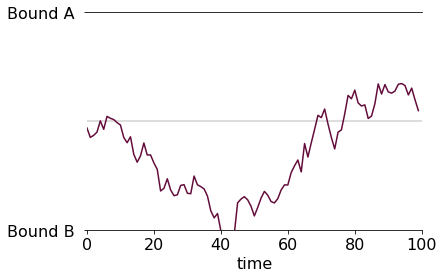

In [31]:
ax = drift_diffusion_plot(data.iloc[:,13], upperbound=10, lowerbound=-10, 
                          upperlabel='Bound A ', lowerlabel='Bound B ', 
                          stickybounds=False)

### plot an example timeseries with sticky bounds (default)

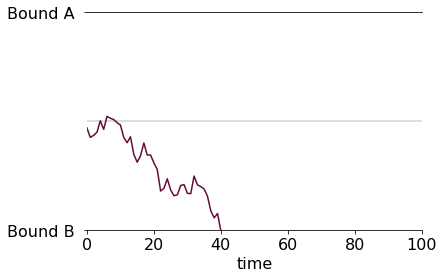

In [32]:
ax = drift_diffusion_plot(data.iloc[:,13], upperbound=10, lowerbound=-10, 
                          upperlabel='Bound A ', lowerlabel='Bound B ')

### customize plot format

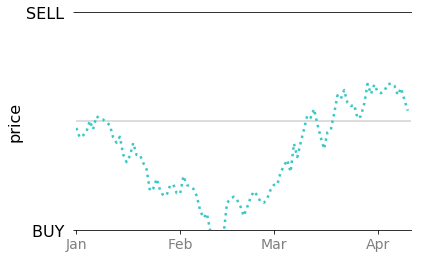

In [34]:
#you can pass in any of the kwargs that matplotlib accepts
ax = drift_diffusion_plot(data.iloc[:,13], upperbound=10, lowerbound=-10, 
                          stickybounds=False,
                          lw=2.5, ls=':', color=customPalette[1])

#return the axis to make additional changes
ax.set_xlabel('');                   #remove x label
ax.set_xticks([0,31,59,90])          #adjust x ticks
ax.set_xticklabels(['Jan','Feb','Mar','Apr'], #change x tick labels
                   size=14, color='gray'); 
ax.set_yticklabels(['BUY ','SELL ']) #add y tick labels
ax.set_ylabel('price');              #add y label


### plot all timeseries, with an overlay of the mean timeseries

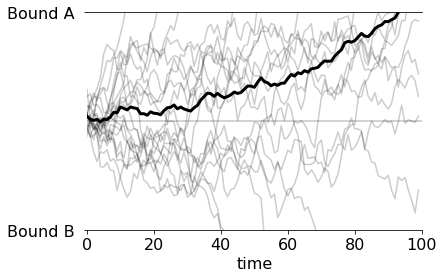

In [35]:
#plot individual timeseries
data.apply(drift_diffusion_plot, upperbound=10, lowerbound=-10, color='black', alpha=0.2);
#plot mean timeseries
drift_diffusion_plot(np.mean(data, axis=1), upperbound=10, lowerbound=-10, 
                     upperlabel='Bound A ', lowerlabel='Bound B ', 
                     color='black', lw=3);

### plot groups of timeseries

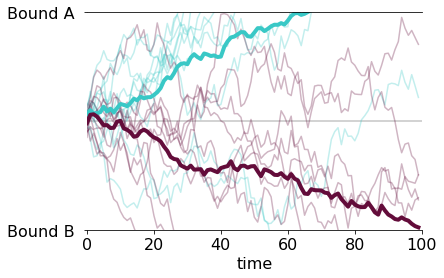

In [36]:
n=10

#group 1 (positive drift)
data1 = pd.DataFrame(np.reshape(np.cumsum(np.random.randn(t,n)+bias,axis=0),(t,n)))
data1.apply(drift_diffusion_plot, upperbound=10, lowerbound=-10, 
            color=customPalette[1], alpha=0.3);

#group 2 (negative drift)
data2 = pd.DataFrame(np.reshape(np.cumsum(np.random.randn(t,n)-bias,axis=0),(t,n)))
data2.apply(drift_diffusion_plot, upperbound=10, lowerbound=-10, 
            color=customPalette[0], alpha=0.3);

#overlay means
drift_diffusion_plot(np.mean(data1, axis=1), upperbound=10, lowerbound=-10,
                     color=customPalette[1], lw=4, alpha=1);
drift_diffusion_plot(np.mean(data2, axis=1), upperbound=10, lowerbound=-10, 
                     upperlabel='Bound A ', lowerlabel='Bound B ', 
                     color=customPalette[0], lw=4, alpha=1);